# Optimisation and interpolation with Bézier curves

By candidate 10099, 10034, 10052

## Introduction


In this project we explore interpolation with piecewise polynomials with Bézier curves. Let $\textbf{p}_0,...,\textbf{p}_n \in \mathbb{R}^d, n \in \mathbb{N}$ denote $n+1$ ordered points. The $n$-th degree Bézier curve is defined by 

$$
\textbf{c}(t) = \textbf{b}_n(t;\textbf{p}_0,...,\textbf{p}_n) = \sum_{i=0}^{n}B_{i,n}(t)\textbf{p}_i,
$$

where $B_{i,n}(t)$ are the $n$-th degree Bernstein polynomial defined by 

$$
B_{i,n}(t) := \binom{n}{i}t^{i}(1-t)^{n-i}, \quad i = 0,...,n,
$$

where $\binom{n}{i}$ denotes the binomial coefficient.

## Task 1: Properties of Bernstein polynomials

In this task, we want to prove some important properties of Bernstein polynomials. These properties are essential in further analysis of properties of composite Bézier curves and in the implementation of several algorithms in this project. We will also implement a function for calculating the Bernstein polynomials numerically, which is the foundation of all Bézier curves. 

### a)

We want to show that 

$$

B_{i,n}(t) = \binom{n}{i}t^{i}(1-t)^{n-i}  \geq 0\quad \forall \quad t \in [0,1]

$$. 

For $t=0$, we have 

$$
B_{i,n}(0) = \binom{n}{i}0^i(1-0)^{n-i} = 0
$$

For $t > 0$, we have that $t^{i} \geq 1 \quad \text{for} \quad 0 < t \leq 1, i = 0,1,...,n$. Also, since $1-t \geq 0\quad \text{for} \quad 0 < t \leq 1$, we have that $(1-t)^{n-i} \geq 1 \quad \forall \quad n\geq 0, i = 0,1,...,n$. Lastly, the binomial coefficient is always larger or equal to zero by definition. Hence,

$$
B_{i,n}(t) \geq 0 \quad \forall \quad t \in [0,1] \quad
$$
$\square$


### b)

We want to show that the Bernstein polynomials for $0 < i < n$ can be recursively defined by 

$$
B_{i,n}(t) = (1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t)\quad \forall \quad t \in [0,1].
$$

We will write out the right hand side and see that this equals the definition of a Bernstein polynomial. 

$$
\begin{align*}
(1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t) &= (1-t)\binom{n-1}{i}t^{i}(1-t)^{n-1-i} + t\binom{n-1}{i-1}t^{i-1}(1-t)^{n-1-(i-1)} \\
&= (1-t)\binom{n-1}{i}t^{i}(1-t)^{n-1}\frac{1}{1-t} + t\binom{n-1}{i-1}t^{i}\frac{1}{t}(1-t)^{n-i} \\
&= \binom{n-1}{i}t^{i}(1-t)^{n-1} + \binom{n-1}{i-1}t^{i}(1-t)^{n-i} \\
&= \big(\binom{n-1}{i} + \binom{n-1}{i-1}\big)t^{i}(1-t)^{n-1} \\
\end{align*}
$$

We need to show that 

$$
\binom{n-1}{i} + \binom{n-1}{i-1} = \binom{n}{i}.
$$

We write out the left hand side,

$$
\begin{align*}
\binom{n-1}{i} + \binom{n-1}{i-1} &= \frac{(n-1)!}{i!(n-1-i)!} + \frac{(n-1)!}{(i-1)!(n-i)!} \\
&= \frac{(n-1)!(n-i)+(n-1)!i}{i!(n-i)!} \\
&= \frac{(n-1)!((n-i)+i)}{i!(n-i)!} \\
&= \frac{(n-1)!n}{i!(n-i)!} \\
&= \frac{n!}{i!(n-i)!} \\
&= \binom{n}{i},
\end{align*}
$$

by the use of the common denominator $i!(n-i)!$. We can now conclude that

$$
\begin{align*}
(1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t) &= \binom{n}{i}t^{i}(1-t)^{n-1} \\
&= B_{i,n}(t) 
\end{align*} 
$$
$\square$ 

For $i = 0$, we get

$$
B_{0,n}(t) = (1-t)\binom{n-1}{0}(1-t)^{n-1}+t\binom{n-1}{-1}t^{-1}(1-t)^n
$$

Since the binomial coefficient is only defined for $i \geq 0$ and the binomial coefficient with $i=0$ is equal to one, we get

$$
B_{0,n}(t)= (1-t)^n
$$

For $i=n$,

$$
\begin{align*}
B_{n,n}(t) &= (1-t)\binom{n-1}{n}t^n(1-t)^{n-1-n} + t\binom{n-1}{n-1}t^{n-1}(1-t)^{n-1-(n-1)} \\
&= 0 + tt^n\frac{1}{t}(1-t)^{0}\\
&= t^n,
\end{align*}
$$

since the binomial coefficient of the same numbers is equal to 1 and it is not defined for $n < i$. 

### c)


We want to show that $B_{i,n}(t)$ form a partition of unity,

$$
\sum_{i=0}^{n}B_{i,n}(t) = 1 \quad \forall \quad t \in [0,1].
$$

Using induction by $n$, we start with the base case $n=0$. 

$$
\sum_{i=0}^{0}B_{i,n}(t) = \binom{0}{0}t^{0}(1-t)^{0} = 1
$$

Now, since this the claim holds for $n=k$, we assume that it holds for $n=k+1$. 

$$
\begin{align*}
\sum_{i=0}^{k+1}B_{i,k+1}(t) 
&= \sum_{i=0}^{k+1}(1-t)B_{i,k+1-1}(t)+ tB_{i-1,k+1-1}(t) \\
&= (1-t)\sum_{i=0}^{k+1}B_{i,k}(t) + t\sum_{i=0}^{k+1}B_{i-1,k}(t) \\
&= (1-t)(B_{i,k+1}(t) + \sum_{i=0}^{k}B_{i,k}(t)) + t(B_{-1,k}(t) + \sum_{i=1}^{k+1}B_{i-1,k}) \\
\end{align*}
$$

We know that $B_{i,k+1}(t) = 0$ and that $B_{-1,k}(t) = 0$. Also, $\sum_{i=0}^{k}B_{i,k}(t) = 1$ since the claim holds for $n=k$. We now write out the latter sum by change of indices, writing $j=i-1$ so that $i=j+1$.

$$
\sum_{i=1}^{k+1}B_{i-1,k}(t) = \sum_{j=0}^{k}B_{j,k}(t) = 1,
$$

since the claim holds for $n=k$. Finally we get 

$$
\begin{align*}
(1-t)(B_{i,k+1}(t) + \sum_{i=0}^{k}B_{i,k}(t)) + t(B_{-1,k}(t) + \sum_{i=1}^{k+1}B_{i-1,k}) &=(1-t)(0+1)+t(0+1)\\
&= 1-t+t \\
&= 1,
\end{align*}
$$

and so the claim also holds for $n=k+1$, which proves that $B_{i,n}(t)$ forms a partition of unity by induction.

$\square$

### d)

We want to show that the derivative is given by

$$
B'_{i,n}(t) = n(B_{i-1,n-1}(t) - B_{i,n-1}(t)).
$$

By normal differentiation and use of the product rule, we get

$$
\begin{align*}
\frac{d}{dt}B_{i,n}(t) 
&= \binom{n}{i}\frac{d}{dt}t^{i}(1-t)^{n-i} \\
&= \binom{n}{i}(it^{i-1}(1-t)^{n-i}-t^{i}(n-i)(1-t)^{n-i}) \\
&= \binom{n}{i}it^{i-1}(1-t)^{n-i} - \binom{n}{i}t^{i}(n-i)(1-t)^{n-i} \\
&= \frac{n!}{i!(n-i)!}it^{i-1}(1-t^{n-i}) - \frac{n!}{i!(n-i)!}t^{i}(n-i)(1-t)^{n-i-1}
\end{align*}
$$

Rewriting $i!$, $n!$ and $(n-i)!$, we get that 

$$
\begin{align*}
\frac{n!}{i!(n-i)!}it^{i-1}(1-t^{n-i}) &= \frac{n(n-1)!}{i(i-1)!(n-1)!}it^{i-1}(1-t)^{n-i} \\
&= n\binom{n-1}{i-1}t^{i-1}(1-t)^{n-i} \\
&= nB_{i-1,n-1}(t)
\end{align*}
$$

and

$$
\begin{align*}
\frac{n!}{i!(n-i)!}t^{i}(n-i)(1-t)^{n-i-1} &= \frac{n(n-1)!}{i!(n-i)(n-i-1)!}t^{i}(n-i)(1-t)^{n-i-1} \\
&= n\binom{n-1}{i}t^{i}(1-t)^{n-1-i} \\
&= nB_{i,n-1}(t).
\end{align*}
$$

Combining the two terms, we get 

$$
\frac{d}{dt}B_{i,n}(t)  = n(B_{i-1,n-1}(t) - B_{i,n-1}(t))
$$
$\square$

We also show that $B_{-1,n-1} \equiv B_{n,n-1} \equiv 0$.

$$
B_{-1,n-1}(t) = \binom{n-1}{-1}t^{-1}(1-t)^{n-1-(-1)} \equiv 0,
$$

since the binomial coefficient is not defined for $i <0$. 

$$
B_{n,n-1}(t) = \binom{n-1}{n}t^{n}(1-t)^{n-n} \equiv 0,
$$

since the binomial coefficient is not defined for $n > i$.

$\square$

### e)

We now want to implement a function $\text{Bernstein(i,n,t)}$ that evaluates the Bernstein polynomials $B_{i,n}(t)$. We will further plot these polynomials for $i=0,...,n$ for $n=4,5,15$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

In [2]:
def Bernstein(i, n, t):
    '''
    Calculates the Bernstein polynomials

    Parameters
    ----------
    i : int
        indices.
    n : int
        degree of polynomial.
    t : array
        array of samples.

    Returns
    -------
    array
        calculated values of the polynomial at t.

    '''
    return binom(n, i) * t**i * (1 - t)**(n - i)


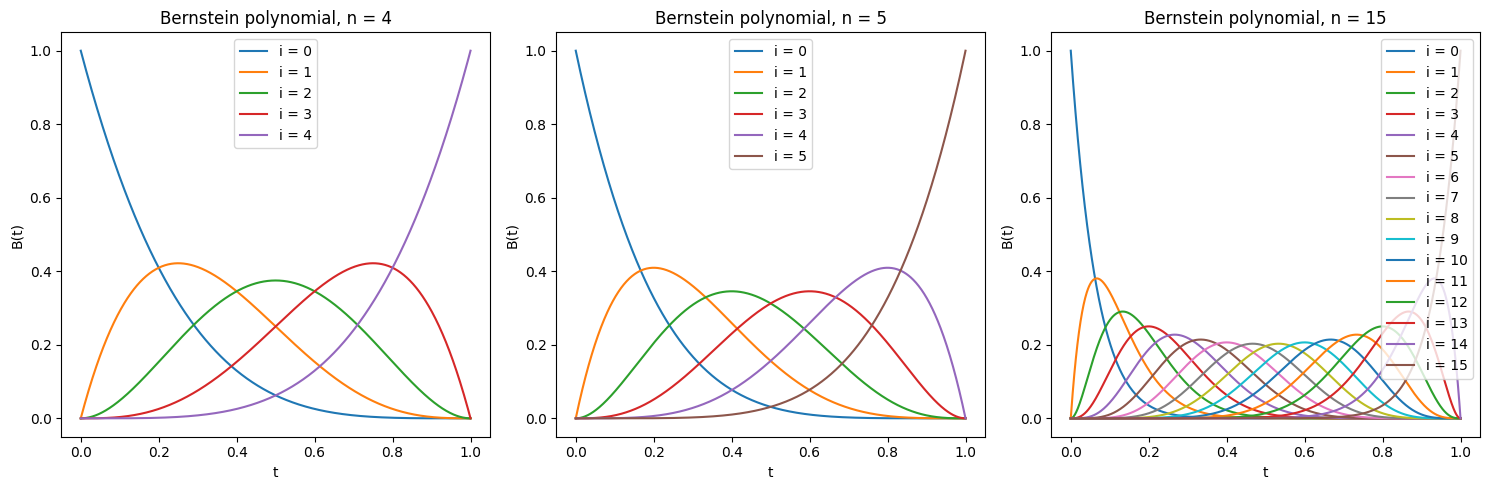

In [3]:
#list of values to compute the polynomials
nList = [4, 5, 15]
t = np.linspace(0, 1, 1000)

#for subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#iterate through n and plot the result
for ax, n in zip(axes, nList):
    for i in range(n + 1):
        ax.plot(t, Bernstein(i, n, t), label=f"i = {i}")
    ax.set_title(f"Bernstein polynomial, n = {n}")
    ax.legend()
    ax.set_xlabel("t")
    ax.set_ylabel("B(t)")

plt.tight_layout()
plt.show()

## Task 2: Properties of composite Bézier curves

We now want to consider the composite Bézier curve $s(t)$, $s: [0,2] \rightarrow \mathbb{R}^{d}$.

$$
\textbf{s}(t) = 
\begin{cases}
    \textbf{c}(t) & \text{for } 0 \leq t < 1 \\
    \textbf{d}(t-1) & \text{for } 1 \leq t \leq 2
\end{cases}
$$

where $\textbf{c}(t) = \textbf{b}(t;\textbf{p}_{0}, ...,\textbf{p}_{n})$ and $\textbf{d}(t) = \textbf{b}(t;\textbf{q}_{0}, ...,\textbf{q}_{n})$ are the Bézier curves for the points $\textbf{p}_{0}, ...,\textbf{p}_{n} \in \mathbb{R}^{d}$ and $\textbf{q}_{0}, ...,\textbf{q}_{n} \in \mathbb{R}^{d}$. We will first prove some properties of the composite Bézier curves, and then implement de Casteljau's algorithm to plot these curves. 

### a)

We want to compute the two first derivatives of $\textbf{c}(t)$ given by 

$$
\textbf{c}(t) = \sum_{i=0}^{n}B_{i,n}(t)\textbf{p}_i.
$$

Starting with $\textbf{c}'(t)$, we have

$$
\begin{align*}
\textbf{c}'(t) &= \sum_{i=0}^{n}B'_{i,n}(t)\textbf{p}_i \\
&= \sum_{i=0}^{n}n\textbf{p}_i(B_{i-1,n-1}(t) - B_{i,n-1}(t)) \\
&= \sum_{i=1}^{n}n\textbf{p}_iB_{i-1,n-1}(t) - \sum_{i=0}^{n-1}n\textbf{p}_iB_{i,n-1}(t),
\end{align*}
$$

using the proven property from $1c)$. Now, we rearrange the first term by shifting the indices. Writing $k=i-1$ such that $i=k+1$, we get

$$
\sum_{i=1}^{n}n\textbf{p}_iB_{i-1,n-1}(t) = \sum_{k=0}^{n-1}n\textbf{p}_{k+1}B_{k,n-1}(t).
$$

Setting $k=i$, we get

$$
\sum_{k=0}^{n-1}n\textbf{p}_{k+1}B_{k,n-1}(t) = \sum_{i=0}^{n-1}n\textbf{p}_{i+1}B_{i,n-1}(t).
$$

We can now finish the expression for $\textbf{c}'(t)$ to obtain

$$
\textbf{c}'(t) = \sum_{i=0}^{n-1}n(\textbf{p}_{i+1}-\textbf{p}_i)B_{i,n-1}(t).
$$

The same procedure follows for $\textbf{c}''(t)$, but we first derive the derivative of $B_{i,n-1}(t)$. 

$$
\begin{align*}
B'_{i,n-1}(t) &= \frac{d}{dt} \frac{(n-1)!}{i!(n-1-i)!}t^{i}(1-t)^{n-1-i} \\
&=  \frac{(n-1)!}{i!(n-1-i)!}it^{i-1}(1-t)^{n-1-i} +  \frac{(n-1)!}{i!(n-1-i)!}t^{i}(n-1-i)(1-t)^{n-1-i-1} \\
&=  \frac{(n-1)!}{(i-1)!(n-1-i)!}t^{i-1}(1-t)^{n-1-i} +  \frac{(n-1)!}{i!(n-2-i)!}t^{i}(1-t)^{n-2-i} \\
&= (n-1)B_{i-1,n-2}(t) + (n-1)B_{i,n-2}(t)
\end{align*}
$$

Now we can calculate the second derivative of $\textbf{c}(t)$.

$$
\begin{align*}
\textbf{c}''(t) &= \sum_{i=0}^{n-1}n(\textbf{p}_{i+1}-\textbf{p}_i)((n-1)(B_{i-1,n-2}(t) + B_{i,n-2}(t))) \\
&= \sum_{i=0}^{n-1}n(n-1)(\textbf{p}_{i+1}-\textbf{p}_i)B_{i-1,n-2}(t) + \sum_{i=0}^{n-2}n(n-1)(\textbf{p}_{i+1}-\textbf{p}_i)B_{i,n-2}(t)
\end{align*}
$$

Using the same procedure as for the first derivative, we rewrite the first term using $k=i-1$, obtaining

$$
\begin{align*}
\textbf{c}''(t) &= \sum_{i=0}^{n-2}n(n-1)(\textbf{p}_{i+2}-\textbf{p}_{i+1})B_{i,n-2}(t) - \sum_{i=0}^{n-2}n(n-1)(\textbf{p}_{i+1}-\textbf{p}_{i})B_{i,n-2}(t) \\
&= \sum_{i=0}^{n-2}n(n-1)B_{i,n-2}(t)(\textbf{p}_{i+2}-2\textbf{p}_{i+1} + \textbf{p}_i).
\end{align*}
$$


### b)

We want to look at how $\textbf{c}(t)$ attend at its end points. 

$$
\textbf{c}(t=0)=\binom{n}{i}0^{i}1^{n-i}\textbf{p}_i = 
\begin{cases}
    \textbf{p}_0 &\text{if} \quad i=0 \\
    0& \text{else},
\end{cases}
$$

and

$$
\textbf{c}(t=1)=\binom{n}{i}1^{i}0^{n-i} = 
\begin{cases}
    \textbf{p}_n & \text{if} \quad i=n \\
    0 & \text{else},
\end{cases}
$$

This relates to interpolation because this makes the Bézier curve pass through the start and end points, i.e. interpolating those points. 

### c)

We want to prove the following properties:

1. $\textbf{c}'(0)=n(\textbf{p}_1 - \textbf{p}_0)$
2. $\textbf{c}'(1)=n(\textbf{p}_n - \textbf{p}_{n-1})$
3. $\textbf{c}''(0)=n(n-1)(\textbf{p}_0 - 2\textbf{p}_1 + \textbf{p}_2)$
4. $\textbf{c}''(1)=n(n-1)(\textbf{p}_n - 2\textbf{p}_{n-1} + \textbf{p}_{n-2})$

To do so, we use the obtained expressons from $1a)$. 

1. $\textbf{c}'(0) = \sum_{i=0}^{n-1}B_{i,n-1}(0)(n(\textbf{p}_{i+1}-\textbf{p}_i))$

Writing out $B_{i,n-1}(0)$,

$$
B_{i,n-1}(0) = \binom{n}{i}0^{i}1^{n-i} = 
\begin{cases}
    1\quad \text{if} \quad i=0 \\
    0\quad \text{else}
\end{cases}
$$

So we get, with $i=0$

$$
\begin{align*}
\textbf{c}'(0) &= \sum_{i=0}^{n-1}B_{i,n-1}(0)(n(\textbf{p}_{i+1}-\textbf{p}_i)) \\
&= n(\textbf{p}_{1}-\textbf{p}_0)
\end{align*}
$$
$\square$

2. $\textbf{c}'(1) = \sum_{i=0}^{n-1}B_{i,n-1}(1)(n(\textbf{p}_{i+1}-\textbf{p}_i))$

We use the same approach here. 

$$
B_{i,n-1}(1) =  \binom{n-1}{i}1^{i}0^{n-1-i} = 
\begin{cases}
    1\quad \text{if} \quad i = n-1 \\
    0\quad \text{else}
\end{cases}
$$

Inserting $i=n-1$, we obtain

$$
\begin{align*}
\textbf{c}'(0) &= \sum_{i=0}^{n-1}B_{i,n-1}(0)(n(\textbf{p}_{i+1}-\textbf{p}_i)) \\
&= n(\textbf{p}_{n}-\textbf{p}_{n-1}) 
\end{align*}
$$
$\square$

3. $\textbf{c}''(0)=\sum_{i=0}^{n-2}B_{i,n-2}(0)(n(n-1)(\textbf{p}_{i+2}-2\textbf{p}_{i+1}+\textbf{p}_i))$

$$
B_{i,n-2}(0) = \binom{n-2}{i}0^{i}1^{n-2-i} = 
\begin{cases}
    1\quad \text{if}\quad i=0 \\
    0\quad \text{else}
\end{cases}
$$

So, inserting $i=0$ into the expression above, we get

$$
\begin{align*}
\textbf{c}''(0)&=\sum_{i=0}^{n-2}B_{i,n-2}(0)(n(n-1)(\textbf{p}_{i+2}-2\textbf{p}_{i+1}+\textbf{p}_i)) \\
&= n(n-1)(\textbf{p}_{2}-2\textbf{p}_{1}+\textbf{p}_0)
\end{align*}
$$
$\square$

1.  $\textbf{c}''(1)=\sum_{i=0}^{n-2}B_{i,n-2}(1)(n(n-1)(\textbf{p}_{i+2}-2\textbf{p}_{i+1}+\textbf{p}_i))$

$$
\sum_{i=0}^{n-2}B_{i,n-2}(1) = \binom{n-2}{i}1^{i}0^{n-2-i} = 
\begin{cases}
    1\quad \text{if}\quad i = n-2 \\
    0\quad \text{else}
\end{cases}
$$

Inserting $i=n-2$, we get

$$
\begin{align*}
\textbf{c}''(1)&=\sum_{i=0}^{n-2}B_{i,n-2}(1)(n(n-1)(\textbf{p}_{i+2}-2\textbf{p}_{i+1}+\textbf{p}_i)) \\
&= n(n-1)(\textbf{p}_{n}-2\textbf{p}_{n-1}+\textbf{p}_{n-2})
\end{align*}
$$
$\square$

Assume we have $d=2$, e.g. $\textbf{p}_0 = (0,0),\textbf{p}_1 = (1,2), \textbf{p}_3 = (2,0)$. For these points, the curve would start at $\textbf{p}_0$, tend upwards because of $\textbf{p}_1$ and then come down again for $\textbf{p}_2$. If we would change $\textbf{p}_1$ to be e.g. $(1,0)$, we would get a straight line since the control point is then on a straight line between $\textbf{p}_0$ and $\textbf{p}_1$. The interpolation properties, i.e. $1)$ and $2)$, ensure that the curve always goes through the end points $\textbf{p}_0$ and $\textbf{p}_1$. Adjusting $\textbf{p}_1$ will adjust the bend of the curve between the two end points. 



### d)

We want to use the property from $1b)$ to show that

$$
\textbf{b}_n(t;\textbf{p}_0,...,\textbf{p}_n) = (1-t)\textbf{b}_{n-1}(t;\textbf{p}_0,...,\textbf{p}_{n-1}) + t\textbf{b}_{n-1}(t;\textbf{p}_1,...,\textbf{p}_{n}).
$$

We start by writing out $\textbf{b}_n$, and use the properties shown in $1d)$ as well. 

$$
\begin{align*}
\textbf{b}_n(t;\textbf{p}_0,...,\textbf{p}_n) &= (1-t)\sum_{i=0}^{n}B_{i,n-1}(t)\textbf{p}_i + t\sum_{i=0}^{n}B_{i-1,n-1}(t)\textbf{p}_i \\
&= (1-t)(B_{n,n-1}(t)\textbf{p}_n + \sum_{i=0}^{n-1}B_{i,n-1}(t)\textbf{p}_i) + t(B_{-1,n-1}\textbf{p}_{0} + \sum_{i=1}^{n}B_{i-1,n-1}(t)\textbf{p}_i) \\
&= (1-t)(0 + \textbf{b}_{n-1}(t;\textbf{p}_0,...,\textbf{p}_{n-1})) + t(0 + \textbf{b}_{n-1}(t;\textbf{p}_1,...,\textbf{p}_{n})) \\
&= (1-t)\textbf{b}_{n-1}(t;\textbf{p}_0,...,\textbf{p}_{n-1}) + t\textbf{b}_{n-1}(t;\textbf{p}_1,...,\textbf{p}_{n})
\end{align*}
$$
$\square$

### e)

In this task we want to implement "de Casteljau's" algorithm using the just proven recursive definition of Bernstein polynomials. The algorithm is used to evaluate $\textbf{b}_n(t;\textbf{p}_0,...,\textbf{p}_n$ at $t_0 \in [0,1]$: 

Starting with $\textbf{p}_{0,i}(t_0) = \textbf{p}_i$ for $k=1,...,n$ and $i=0,...,n-k$ compute 

$$
\textbf{p}_{k,i}(t_0) = (1-t_0)\textbf{p}_{k-1,i}(t_0)+t_0\textbf{p}_{k-1,i+1}(t_0)
$$

and then set $\textbf{b}_n(t;\textbf{p}_0,...,\textbf{p}_n) = \textbf{p}_{n,0}$

We will plot the corresponding curve for the points

$$
\textbf{p}_0 = 
\begin{bmatrix}
0 \\
0
\end{bmatrix}, 
\textbf{p}_1 = 
\begin{bmatrix}
-1\\
5
\end{bmatrix}, 
\textbf{p}_2 = 
\begin{bmatrix}
4 \\
4
\end{bmatrix}, 
\textbf{p}_3 = 
\begin{bmatrix}
9 \\
3
\end{bmatrix}, 
\textbf{p}_4 = 
\begin{bmatrix}
8\\
8
\end{bmatrix},
$$

and include one line per "level" k connecting the points when evaluating the curve at $t_0 = \frac{1}{3}$. 


In [4]:
def de_Casteljau(P, t):
    '''
    Calculate the Bézier curve using de Casteljau's algorithm 
    as described in the task

    Parameters
    ----------
    P : array
        points to describe the Bézier curve.
    t : array
        array of samples.

    Returns
    -------
    array
        values at the starting point.
    Pvecs : array
        array containing all evaluations.

    '''
    n = len(P)                                                      #length of loop
    Pvecs = [np.copy(P)]                                            #copy the original P
    for k in range(1, n):                                       
        Q = np.zeros((n-k, 2))                                      #empty array to store values
        for i in range(n - k):
            Q[i] = (1-t) * Pvecs[k-1][i] + t * Pvecs[k-1][i+1]      #calculate the intermediate points
        Pvecs.append(Q)                                             #add points to array
    return Pvecs[-1][0], Pvecs

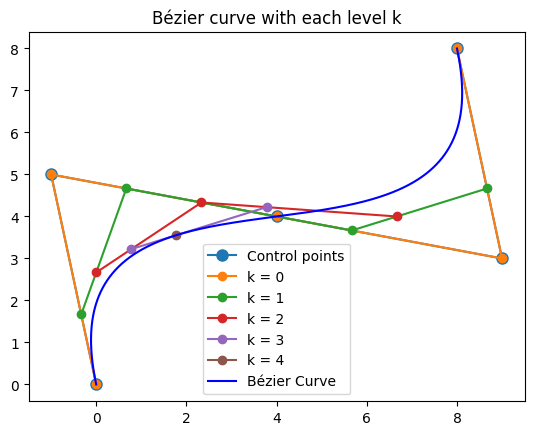

In [5]:
#define the points and t0
P = np.array([[0, 0], [-1, 5], [4, 4], [9, 3], [8, 8]])
t0 = 1/3  

#obtain the calculated values
Pvec0, Pvecs = de_Casteljau(P, t0)

#make t array to calculate the corresponding Bézier curve
tValues = np.linspace(0, 1, 1000)
bezier = np.array([de_Casteljau(P, t)[0] for t in tValues])

#plot the resulting controlpoints
plt.plot(P[:, 0], P[:, 1], 'o-', markersize=8, label='Control points')
for i, vec in enumerate(Pvecs):
    plt.plot(vec[:, 0], vec[:, 1], 'o-', label=f'k = {i}')

#plot the Bézier curve
plt.plot(bezier[:, 0], bezier[:, 1], 'b-', label='Bézier Curve')
plt.title("Bézier curve with each level k")
plt.legend()
plt.show()

### f)
 
We want to consider $\textbf{s}(t)$ to be a $C^{k}, k = 0,1,2$ and impose some properties for each of these cases of $k$.

1) The critical points of $\textbf{s}(t)$ for the property to be a $C^{k}$ function are the points $\textbf{s}^{(k)}(1)$, this is the point where me merge two different Bezier curves. Since $C^{k}$ is differentiable k-times and the k-th derivative has to be continous we need it to be continous in each of these points.

2) The properties that have to hold for continuity in $k=0$ is only continuity in the start and end point of each Bezier curve. This means:
$$
\textbf{s}(^{-}1) = \textbf{s}(^{+}1) \implies \textbf{c}(1) = \textbf{d}(0) \implies \textbf{p}_{n} = \textbf{q}_{0}
$$

3) The properties that have to hold for $\textbf{s}(t)$ to be continously differentiable: 

$$
\textbf{s}^{(k)}(^{-}1) = \textbf{s}^{(k)}(^{+}1) \implies \textbf{c}^{(k)}(1) = \textbf{d}^{(k)}(0), k = 0,1
$$
For $k=0$ we achieve the same property as in 2:
$$
\textbf{p}_{n} = \textbf{q}_{0}
$$
For $k=1$:

$$
\begin{array}{c}
\textbf{c}'(1) = \textbf{d}'(0) \\
n(\textbf{p}_{n} - \textbf{p}_{n-1}) = n(\textbf{q}_{1} - \textbf{q}_{0}) \\
\textbf{p}_{n-1} = -\textbf{q}_{1} + 2\textbf{q}_{0} \text{ and } \textbf{q}_{1} = 2\textbf{p}_{n} - \textbf{p}_{n-1}
\end{array}
$$


4) The properties that have to hold for $\textbf{s}(t)$ to be twice continously differentiable: 

$$
\textbf{s}^{(k)}(^{-}1) = \textbf{s}^{(k)}(^{+}1) \implies \textbf{c}^{(k)}(1) = \textbf{d}^{(k)}(0), k = 0,1,2
$$

For $k = 2$: 
$$
\begin{array}{c}
\textbf{c}''(1) = \textbf{d}''(0) \\
n(n-1)(\textbf{p}_{n} - 2\textbf{p}_{n-1} + \textbf{p}_{n-2}) = n(n-1)(\textbf{q}_{0} - 2\textbf{q}_{1} + \textbf{q}_{2}) \\
\textbf{p}_{n} - 2\textbf{p}_{n-1} + \textbf{p}_{n-2} = \textbf{q}_{0} - 2\textbf{q}_{1} + \textbf{q}_{2} \\
\textbf{p}_{n-2} = 4\textbf{q}_{0} - 4\textbf{q}_{1} + \textbf{q}_{2} \text{ and } \textbf{q}_{2} = 4\textbf{p}_{n} - 4\textbf{p}_{n-1} + \textbf{p}_{n-2}
\end{array}
$$


5) When we let $n=3$ and look at how many degrees of freedom we have left to interpolate the data points $\textbf{d}_{0}, \textbf{d}_{1}, \textbf{d}_{2}$, we first have to look at the first constraint $k=0$ from the properties derived in 3):

$$
\textbf{s}^{(k)}(^{-}1) = \textbf{s}^{(k)}(^{+}1) \implies \textbf{c}^{(k)}(1) = \textbf{d}^{(k)}(0), k = 0,1
$$ 
We get: $\textbf{c}(1) = \textbf{d}(0)$

From the text we have:
$$
\textbf{s}(h) = \textbf{d}_{h}, h = 0,1,2
$$
Which tells us: 
$$
\textbf{d}_{0} = \textbf{s}(0) = \textbf{p}_{0} 
$$
$$
\textbf{d}_{1} = \textbf{s}(1) = \textbf{p}_{3} = \textbf{q}_{0}
$$
$$
\textbf{d}_{2} = \textbf{s}(2) = \textbf{q}_{3}
$$
These three points are then defined by the data points and we are not free to choose either of these points.

For k = 1 we get:
$$
\textbf{c}'(1) = \textbf{d}'(0)
$$
$$
3(\textbf{p}_{3} - \textbf{p}_{2}) = 3(\textbf{q}_{1}- \textbf{q}_{0})
$$
In this case both $\textbf{p}_{3}$ and $\textbf{q}_{0}$ are constrained and equal to $\textbf{d}_{1}$, this gives us the freedom to choose either $\textbf{p}_{2}$ or $\textbf{q}_{1}$ and hence one degree of freedom from this constraint. We have $\textbf{p}_{1}$ and $\textbf{q}_{2}$ left and can choose these points freely. In total we have three degrees of freedom. 

In the case where $\textbf{s} \in C^{2}$, we add k = 2, the same properties as we found in 4): 
$$
\textbf{s}^{(k)}(^{-}1) = \textbf{s}^{(k)}(^{+}1) \implies \textbf{c}^{(k)}(1) = \textbf{d}^{(k)}(0), k = 0,1,2
$$ 
We have the property: 
$$
\textbf{c}''(1) = \textbf{d}''(0)
$$
$$
6(\textbf{p}_{3} -2\textbf{p}_{2}+\textbf{p}_{1}) = 6(\textbf{q}_{0} - 2\textbf{q}_{1} + \textbf{q}_{2})
$$

From this property we bound $\textbf{p}_{1}$ and $\textbf{q}_{2}$ and we reduce the degrees of freedom with one, and we end up with two degrees of freedom.

6) If we want $\textbf{s}(t)$ to be periodic for the case $k=1$ we need it to be continously differentiable in the end point aswell: 

$$
\textbf{d}^{(k)}(1) = \textbf{c}^{(k)}(0), k = 0,1
$$

## Task 3: Interpolation with composite, cubic Bézier curves

To obtain a spline, we consider composite Bézier curves. In other words, we "stitch" together several Bézier curves. Given a number of $m$ segments and $4m$ points $\textbf{p}_{0,i},\textbf{p}_{1,i},\textbf{p}_{2,i},\textbf{p}_{3,i} \in \mathbb{R}^d$ for $i=1,...,m$ we define

$$
\textbf{B}(t) = \{b_3(t-i+1; \textbf{p}_{0,i},\textbf{p}_{1,i},\textbf{p}_{2,i},\textbf{p}_{3,i})\quad \text{for}\quad i-1\leq t < i\quad \text{and each}\quad i=1,...,m\}
$$

In this task we first derive implement a couple of functions that will be used to make letters using composite Bézier curves. We will experiment with different set of control points, and see how this affects the plot of the letter.

### a)

In this task, we want to look at a composite Bézier curve so that we can obtain a spline. We will implement a function $\text{composite-Bezier(P,t)}$ that evaluates $\textbf{B}(t), t \in [0,m]$ with $P$ is a matrix of control points. The control points used in this task are

$$
\begin{align*}
\textbf{p}_{0,1} &= 
\begin{bmatrix}
    -1 \\
    0
\end{bmatrix},
\textbf{p}_{1,1} =
\begin{bmatrix}
    -1 \\
    \frac{1}{3}
\end{bmatrix}, 
\textbf{p}_{2,1}  =
\begin{bmatrix}
    -\frac{1}{3} 
    1
\end{bmatrix} ,
\textbf{p}_{3,1} = 
\begin{bmatrix}
    0 \\
    1
\end{bmatrix} \\
\textbf{p}_{0,2} &= 
\begin{bmatrix}
    0 \\
    1
\end{bmatrix} ,
\textbf{p}_{1,2} =
\begin{bmatrix}
    \frac{1}{3} \\
    1
\end{bmatrix},
\textbf{p}_{2,2}  =
\begin{bmatrix}
    1 \\
    \frac{1}{3}
\end{bmatrix},
\textbf{p}_{3,2} = 
\begin{bmatrix}
    1 \\
    0
\end{bmatrix} \\
\textbf{p}_{0,3} &= 
\begin{bmatrix}
    1 \\
    0
\end{bmatrix}, 
\textbf{p}_{1,3} =
\begin{bmatrix}
    1 \\
    -\frac{1}{3}
\end{bmatrix} ,
\textbf{p}_{2,3} =
\begin{bmatrix}
    \frac{1}{3} \\
    -1
\end{bmatrix},
\textbf{p}_{3,3} = 
\begin{bmatrix}
    0 \\
    -1
\end{bmatrix} \\
\end{align*}
$$

In [6]:
def composite_Bezier(P):
    '''
    Calculates a composite Bézier curve as described in the task

    Parameters
    ----------
    P : array
        points to describe the composite curve.

    Returns
    -------
    array
        the composite Bézier curve.

    '''
    m = P.shape[1]                                                                      #segments
    bezier = []                                                                         #list to store computed values
    for i in range(m):          
        curvePoints = P[:,i]                                                            #curve points of the segment i
        tValues = np.linspace(i-1, i, 1000)                                             #initiate array of smples
        bezierSegment = [de_Casteljau(curvePoints, tval-i+1)[0] for tval in tValues]    #compute the Bézier curve of the segment
        bezier.extend(bezierSegment)                                                    #add to list
    return np.array(bezier)                                                             #returns as np.array for plotting purposes

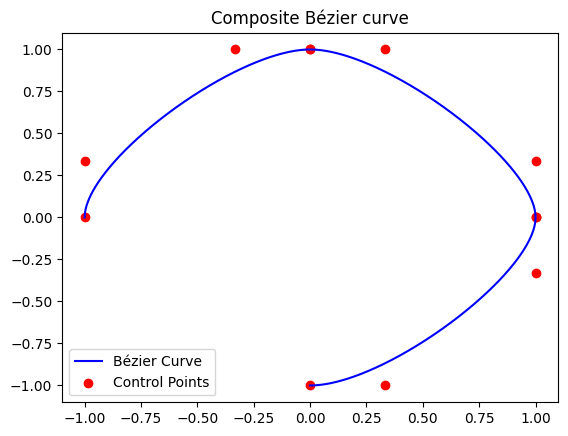

In [7]:
#define the control points
p01 = np.array([-1, 0])
p11 = np.array([-1, 1/3])
p21 = np.array([-1/3, 1])
p31 = np.array([0, 1])
p02 = np.array([0, 1])
p12 = np.array([1/3, 1])
p22 = np.array([1, 1/3])
p32 = np.array([1, 0])
p03 = np.array([1, 0])
p13 = np.array([1, -1/3])
p23 = np.array([1/3, -1])
p33 = np.array([0, -1])

P = np.array([
    [p01, p02, p03],
    [p11, p12, p13],
    [p21, p22, p23],
    [p31, p32, p33]
])

#get the composite curve and plot the result with control points
bezier = composite_Bezier(P)
plt.plot(bezier[:, 0], bezier[:, 1], 'b-', label='Bézier Curve')
control_points = P.reshape(-1, 2)
plt.scatter(control_points[:, 0], control_points[:, 1], color='red', marker='o', label='Control Points')
plt.title("Composite Bézier curve")
plt.legend()
plt.show()

### b)

Using the properties derived so far, we want to derive an algorithm for the following problem: 

Given data points $\textbf{a}_0,...,\textbf{a}_{m-1} \in \mathbb{R}^d$ and velocities $\textbf{v}_0,...,\textbf{v}_{m-1} \in \mathbb{R}^d$, we want to find the periodic composite Bézier curve $\textbf{B}(t) : [0,m] \to \mathbb{R}^d$ with the following properties: 

$$1. \textbf{B}(0) = \textbf{B}(m)$$
$$2. \textbf{B}'(0) = \textbf{B}'(m)$$
$$3. \textbf{B}(i) = \textbf{a}_i, i = 0,...,m-1$$
$$4. \textbf{B}'(i) = \textbf{v}_i, i = 0,...,m-1$$

In addition to this, we want to implement a function $\text{interpolate-periodic(A,V)}$ where $A$ is the vector of the interpolation points and $V$ is the vector of velocities. 

Using the above properties and the properties we derived in $2c)$, i.e. $\textbf{B}'(0)=n(\textbf{p}_1-\textbf{p}_0)$ and $\textbf{B}'(1)=n(\textbf{p}_n-\textbf{p}_{n-1})$, we obtain 

$$
\textbf{B}(0)=\textbf{p}_0 = \textbf{a}_i
$$
$$
\textbf{B}'(0)=3(\textbf{p}_1-\textbf{p}_0 ) = \textbf{v}_i,
$$
which leads to
$$
\textbf{p}_{1,i} = \textbf{a}_i + \frac{\textbf{v}_i}{3}.
$$

Also using 

$$
\textbf{B}'(1)=\textbf{p}_3 = \textbf{a}_{i+1},
$$
$$
\textbf{B}'(0)=3(\textbf{p}_3-\textbf{p}_2) = \textbf{v}_{i+1},
$$
we get
$$
\textbf{p}_{2,i} = \textbf{a}_{i+1} - \frac{\textbf{v}_{i+1}}{3}
$$

The equations for $\textbf{p}_{1,i}$ and $\textbf{p}_{2,i}$ will be used to implement the function $\text{interpolate-periodic(A,V)}$.

In [8]:
def interpolate_periodic(A, V):
    '''
    Calculates the interpolation of the periodic composite Bézier curve

    Parameters
    ----------
    A : array
        interpolation points.
    V : array
        velocities.

    Returns
    -------
    control_points : array
        the interpolated control points.

    '''
    m = len(A)                                                         #segments
    controlPoints = np.zeros((4, m, 2))                                #array to store the new points

    for i in range(m):
        controlPoints[0, i] = A[i]                                     #ensure periodicity
        controlPoints[1, i] = A[i] + (1/3) * V[i]                      #control points
        controlPoints[2, i] = A[(i+1) % m] - (1/3) * V[(i+1) % m]      #control points and ensure periodicity 
        controlPoints[3, i] = A[(i+1) % m]                             #ensure periodicity 

    return controlPoints

The resulting curve $\textbf{B}$ is at least $C^0$ continous as the starting point is equal to the ending point, i.e. $\textbf{B}(0) = \textbf{B}(m)$. For the curve to be differentiable, we need that its differentiable at the junctions, i.e. the end of one segment and the start of the next. We need that $\textbf{p}_{1,m-1} = \textbf{p}_{2,0}$, or in other words

$$
\textbf{a}_{m-1} + \frac{\textbf{v}_{m-1}}{3} = \textbf{a}_1 - \frac{\textbf{v}_1}{3}.
$$

This condition ensures that the derivative in magnitude and direction at the junction is the same for the first and next segment. This means that the curve $\textbf{B}$ is $C^1$ smooth. 

### c)


We now want to use some data points from a drawing of a letter to see how our functions work. We sketched a drawing of the letter N, and used some of the points on the drawing as control points. We plotted the result using $\text{composite-Bezier(P,t)}$. 

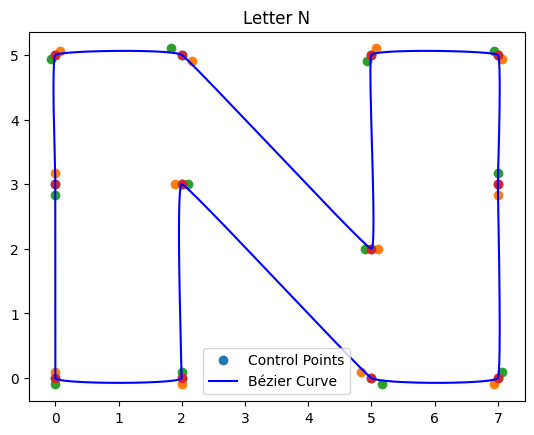

In [9]:
#letter N and velocities, multiply velocities with 1/10 to get a smooth letter
N = np.array([(0,0),(0,3),(0,5),(2,5),(5,2),(5,5),(7,5),(7,3),(7,0),(5,0),(2,3),(2,0)])
vel = np.array([(0,3),(0,5),(2,2),(5,-3),(3,0),(2,3),(2,-2),[0, -5],[-2, -3],[-5, 3],[-3, 0],[0, -3]])*1/10

#obtain control points 
controlPoints = interpolate_periodic(N, vel)

#get the Bézier curve
bezier = composite_Bezier(controlPoints)

#plot the control points
plt.plot(controlPoints[0, :, 0], controlPoints[0, :, 1], 'o', label='Control Points')
for i in range(1, controlPoints.shape[0]):
    plt.plot(controlPoints[i, :, 0], controlPoints[i, :, 1], 'o')

#plot the letter
plt.plot(bezier[:, 0], bezier[:, 1], 'b-', label='Bézier Curve')
plt.title("Letter N")
plt.legend()
plt.show()

### d)

We want to look at how our curves changes using new sets of points. We use the control points obtained in $3c)$ to find the new points given by

1. $Q$ where $\textbf{q}_{ij} = 2\textbf{p}_{ij}$
2. $R$ where $\textbf{r}_{ij} = \begin{bmatrix} \cos(\frac{\pi}{8}) & -\sin(\frac{\pi}{8}) \\ \sin(\frac{\pi}{8}) & \cos(\frac{\pi}{8})\end{bmatrix}\textbf{p}_{ij}$
3. $S$ where each $\textbf{s}_{ij}=\begin{bmatrix} 1 & \frac{1}{2} \\ 1 & 0 \end{bmatrix}\textbf{p}_{ij} + \frac{1}{3}\begin{bmatrix} 1 \\ 1 \end{bmatrix}$
4. $T$ where each $\textbf{t}_{ij}=\begin{bmatrix} -1 & -\frac{2}{3} \\ 1 & 0 \end{bmatrix}\textbf{p}_{ij} + \frac{1}{4}\begin{bmatrix} 1 \\ -1 \end{bmatrix}$

for $i=0,1,2,3, j = 0,...,m-1$.

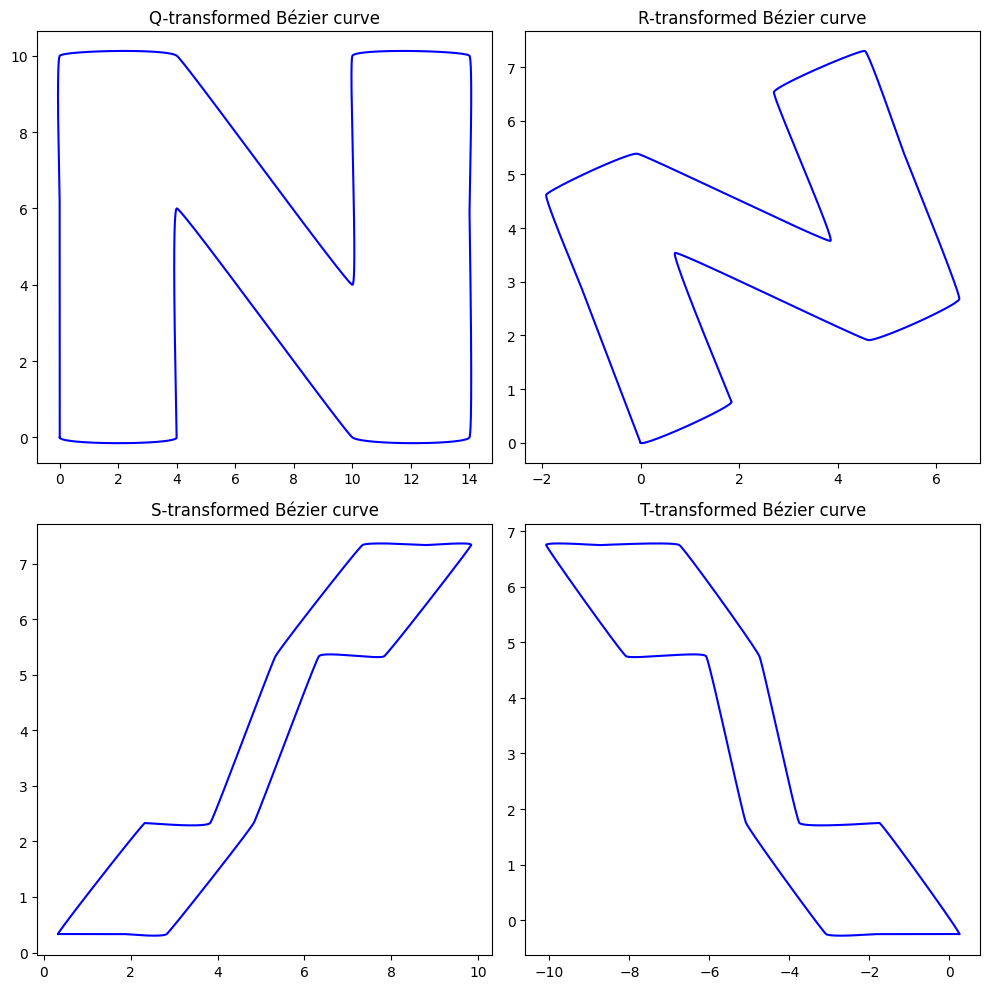

In [10]:
#define arrays to store values and the factors to find new points
Q = 2 * controlPoints
R = np.zeros(controlPoints.shape)
S = np.zeros(controlPoints.shape)
T = np.zeros(controlPoints.shape)
Rfactor = np.pi/8
Rmultiplier = np.array([[np.cos(Rfactor),-np.sin(Rfactor)],[np.sin(Rfactor),np.cos(Rfactor)]])
Smultiplier = np.array([[1,1/2],[1,0]])
Tmultiplier = np.array([[-1,-2/3],[1,0]])

#calculate the new points 
for i in range(controlPoints.shape[0]):
    for j in range(controlPoints.shape[1]):
        R[i, j] = Rmultiplier @ controlPoints[i, j]
        S[i, j] = Smultiplier @ controlPoints[i, j] + np.array([1/3,1/3])
        T[i, j] = Tmultiplier @ controlPoints[i, j] + np.array([1/4,-1/4])

#calculate the new curves
Qbezier = composite_Bezier(Q)
Rbezier = composite_Bezier(R)
Sbezier = composite_Bezier(S)
Tbezier = composite_Bezier(T)

#plot the result
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot(Qbezier[:, 0], Qbezier[:, 1], 'b-')
axs[0, 0].set_title("Q-transformed Bézier curve")
axs[0, 1].plot(Rbezier[:, 0], Rbezier[:, 1], 'b-')
axs[0, 1].set_title("R-transformed Bézier curve")
axs[1, 0].plot(Sbezier[:, 0], Sbezier[:, 1], 'b-')
axs[1, 0].set_title("S-transformed Bézier curve")
axs[1, 1].plot(Tbezier[:, 0], Tbezier[:, 1], 'b-')
axs[1, 1].set_title("T-transformed Bézier curve")
plt.tight_layout()
plt.show()

For the $Q$ control points, we expect the same letter but twice as large. As we see from the axes, this is what we get. From the multiplier in $R,$ we have a rotation matrix with angles $\approx 21.9$ degrees, so we see that the output also corresponds to this rotation. For $S$, we get a larger x-value as we can see from the definition of $S$. We see that the letter is stretched horisontally and shifted upwards, to the right. For $T$, we notice the opposite. Here, the letter is shifted towards the left with negative values along the x-axis. This can easily be seen from the definition of $T$, as we get negative values for the x-coordinates. 

## Task 4: Optimisation with Bézier curves

In this final task, we assume that we have composite Bézier curves $\textbf{B}(t)$, with $m$ segments. We will also assume that $\textbf{B}(t)$ is $C^1$. We will minimize the acceleration of the Bézier curves and extend the problem in the last section of this task. 

### a)

Due to $\textbf{B}(t)$ being continous, we have that $\textbf{p}_{3,i} = \textbf{p}_{0,i+1}$. Similarly for $\textbf{p}_{2,i}$, we can express this as a combination of $\textbf{p}_{0,i+1}$ and $\textbf{p}_{1,i+1}$. Using the fact that $\textbf{B}(t)$ is differentiable, we get

$$
\textbf{p}_{3,i} - \textbf{p}_{2,i} = \textbf{p}_{1,i+1} - \textbf{p}_{0,i+1},
$$

and using that $\textbf{p}_{3,i} = \textbf{p}_{0,i+1}$, we get

$$
\textbf{p}_{0,i+1} - \textbf{p}_{2,i} = \textbf{p}_{1,i+1} - \textbf{p}_{0,i+1}.
$$

Rearranging this, we finally obtain

$$
\textbf{p}_{2,i} = 2\textbf{p}_{0,i+1} - \textbf{p}_{1,i+1}. 
$$

The "data" we store for $\textbf{p}_{2,i}$ is just one vector in $\mathbb{R}^d$. We can phrase this in terms of the velocity $\textbf{v}_{i+1}$ at $\textbf{p}_{0,i}$ to recover both "neigboring" points. Since the velocity tells us the direction, we write 

$$
\textbf{v}_{i+1} = \textbf{p}_{1,i+1} - \textbf{p}_{0,i+1}
$$

Rearranging this term for $\textbf{p}_{1,i+1}$ and plugging in the result for $\textbf{p}_{2,i}$ above, we obtain

$$
\textbf{p}_{2,i} = \textbf{p}_{0,i+1} - \textbf{v}_{i+1}.
$$

### b)


We would like to minimize the acceleration of the curve

$$
F(\textbf{P}) := \int_{0}^{m}||\textbf{B}''(t)||^2\text{d}t
$$

with respect to the remaining control points 

$$
\textbf{P} = [\textbf{p}_{0,1},\textbf{p}_{1,1}, \textbf{p}_{0,2}, \textbf{p}_{1,2},...,\textbf{p}_{0,m-1},\textbf{p}_{1,m-1},\textbf{p}_{0,m},\textbf{p}_{1,m},\textbf{p}_{2,m},\textbf{p}_{3,m}]
$$

We will first derive a closed form for the integral 

$$
\int_{0}^{1}||\textbf{b}_3''(t;\textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3)||_2^2\text{d}t,
$$

where $\textbf{b}_3(t;\textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3)$ is the cubic Bézier curve for one segment with $\textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3 \in \mathbb{R}^2$.

We will use a couple of results from the previous tasks. We remember that $\textbf{b}(t)=\textbf{c}(t)$, and we have already established this second derivative. With $n=3$ we obtain

$$
\begin{align*}
\textbf{b}''_3(t) &= \sum_{i=0}^{n-2}n(n-1)B_{i,n-2}(t)(\textbf{q}_{i+2}-2\textbf{q}_{i+1} + \textbf{q}_i) \\
&= \sum_{i=0}^{1}3(2)B_{i,1}(t)(\textbf{q}_{i+2}-2\textbf{q}_{i+1} + \textbf{q}_i) \\
&= 6B_{0,1}(t)(\textbf{q}_{2}-2\textbf{q}_{1} + \textbf{q}_0) + 6B_{1,1}(t)(\textbf{q}_{3}-2\textbf{q}_{2} + \textbf{q}_1)
\end{align*}
$$

We also have established that $B_{0,1}=(1-t)^n$ and $B_{n,n}=t^n$, so we get

$$
\textbf{b}''_3(t) = 6(1-t)(\textbf{q}_{2}-2\textbf{q}_{1} + \textbf{q}_0) + 6t(\textbf{q}_{3}-2\textbf{q}_{2} + \textbf{q}_1)
$$

Next, we evaluate $||\textbf{b}_3''(t;\textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3)||_2^2$. We get

$$
\begin{align*}
||\textbf{b}_3''(t;\textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3)||_2^2 &= (6(1-t)(\textbf{q}_2 - 2\textbf{q}_1 + \textbf{q}_0) + 6t(\textbf{q}_3 - 2\textbf{q}_2+\textbf{q}_1))^2 \\
&= 36(1-t)^2(\textbf{q}_2 - 2\textbf{q}_1 + \textbf{q}_0)^2 + 12(1-t)(\textbf{q}_2 - 2\textbf{q}_1 + \textbf{q}_0)6t(\textbf{q}_3 - 2\textbf{q}_2+\textbf{q}_1) + 36t^2(\textbf{q}_3 - 2\textbf{q}_2+\textbf{q}_1)^2
\end{align*}
$$

Lastly, we perform the integration. 

$$
\begin{align*}
\int_{0}^{1}||\textbf{b}_3''(t;\textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3)||_2^2\text{d}t &= \int_{0}^{1}36(1-t)^2(\textbf{q}_2 - 2\textbf{q}_1 + \textbf{q}_0)^2 + 12(1-t)(\textbf{q}_2 - 2\textbf{q}_1 + \textbf{q}_0)6t(\textbf{q}_3 - 2\textbf{q}_2+\textbf{q}_1) + 36t^2(\textbf{q}_3 - 2\textbf{q}_2+\textbf{q}_1)^2 \text{d}t \\
&= 12\textbf{q}_0^2+12\textbf{q}_0(\textbf{q}_3-3\textbf{q}_1)+36\textbf{q}_1^2+36\textbf{q}_2^2+12\textbf{q}_3^2-36\textbf{q}_1\textbf{q}_2-36\textbf{q}_2\textbf{q}_3
\end{align*}
$$

We can now derive the gradient of 

$$
\tilde{F}(\textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3) := \int_{0}^{1}||\textbf{b}_3''(t;\textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3)||_2^2\text{d}t
$$

with respect to the control points $\textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3$. We  obtain

$$
\nabla \tilde{F}(\textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3) = 
\begin{bmatrix}
24\textbf{q}_0 - 36\textbf{q}_1+12\textbf{q}_3\\
-36\textbf{q}_0+72\textbf{q}_1-36\textbf{q}_2 \\
-36\textbf{q}_1+72\textbf{q}_2-36\textbf{q}_3 \\
12\textbf{q}_0-36\textbf{q}_2+24\textbf{q}_3
\end{bmatrix} 
= 12 \begin{bmatrix}
2\textbf{q}_0 - 3\textbf{q}_1+\textbf{q}_3\\
-3\textbf{q}_0+6\textbf{q}_1-3\textbf{q}_2 \\
-3\textbf{q}_1+6\textbf{q}_2-3\textbf{q}_3 \\
\textbf{q}_0-3\textbf{q}_2+2\textbf{q}_3
\end{bmatrix}
$$


This result can be used to compute the gradient of $F$ by using the fact that $\textbf{B}(t)$ is continously differentiable. Because of this, we can use the result of $\nabla \tilde{F}$ of each segment of $F$ to obtain the final gradient of $F$. In addition, we can also use the result of $4a)$ to simplify this gradient by removing $\textbf{q}_2$ and $\textbf{q}_3$ as they can be found by $\textbf{q}_0$ and $\textbf{q}_1$. 


### c)


The first optimality conditions of optimisation tells us that  if $\textbf{x}^{*}$ is a local minimizer and $F\in C^1(B(\textbf{x}^{*};R);\mathbb{R})$ for a $R>0$, then

$$
\nabla F(\textbf{x}^{*}) = 0.
$$

If we would want to find such a minimizer, we would set the gradient we found in $4b)$ to zero. That means we would want to solve the system

$$
\begin{bmatrix}
24\textbf{q}_0 - 36\textbf{q}_1+12\textbf{q}_3\\
-36\textbf{q}_0+72\textbf{q}_1-36\textbf{q}_2 \\
-36\textbf{q}_1+72\textbf{q}_2-36\textbf{q}_3 \\
12\textbf{q}_0-36\textbf{q}_2+24\textbf{q}_3
\end{bmatrix} 
\begin{bmatrix}
\textbf{q}_0 \\
\textbf{q}_1 \\
\textbf{q}_2 \\
\textbf{q}_3
\end{bmatrix} = 
\begin{bmatrix}
0 \\
0 \\
0 \\
0
\end{bmatrix}.
$$

Doing so, we obtain the solution

$$
\textbf{q}_0 = 3\textbf{q}_2 - 2\textbf{q}_3
$$
$$
\textbf{q}_1 = 2\textbf{q}_2 - \textbf{q}_3,
$$

and we see that the solution is not unique. For the overall problem $F$, we still do not obtain a unique solution. We can use $\nabla{\tilde{F}}$ for each segment to calculate the whole gradient of $F$. Since the solution of $\nabla{\tilde{F}} = \textbf{0}$ is not unique, the solution of the whole gradient would not be unique either. This is because of the $C^1$ property, which means that we always can use the results from $4a)$ to find different expressions of $\textbf{q}_3$ and $\textbf{q}_2$.

### d)

Assume that we extend the problem to have some data points $\textbf{d}_i \in \mathbb{R}^2, i=0,1...,m$ and for $\lambda > 0$,

$$
G_{\lambda}(\textbf{P}) = \frac{\lambda}{2}\sum_{i=0}^{m}||\textbf{d}_i - \textbf{B}(i)||_2^2+\int_{0}^{m}||\textbf{B}''(t)||^2\text{d}t.
$$

We first look at the simplified problem, i.e. given two points $\textbf{s},\textbf{e} \in \mathbb{R}^2$ and $\lambda > 0$, we get 

$$
\begin{align*}
\tilde{G}_{\lambda}(\textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3) &= \frac{\lambda}{2}(||\textbf{s} - \textbf{b}_3(0; \textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3)||_2^2 + ||\textbf{e} - \textbf{b}_3(1; \textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3)||_2^2) + \tilde{F}(\textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3) \\
&= \frac{\lambda}{2}(||\textbf{s}-\textbf{q}_0||_2^2+||\textbf{e}-\textbf{q}_2||_2^2) + \tilde{F}(\textbf{q}_0,\textbf{q}_1,\textbf{q}_2,\textbf{q}_3) \\
\end{align*}
$$

To see how this change the question of uniqueness, we first find the gradient of $\tilde{G}$ and see if the minimizer is unique. 


$$
\nabla \tilde{G} = 
\frac{\lambda}{2}
\begin{bmatrix}
-2\textbf{s}+2\textbf{q}_0 \\
0 \\
0 \\ 
-2\textbf{e} + 2\textbf{q}_0
\end{bmatrix} + 
\begin{bmatrix}
24\textbf{q}_0 - 36\textbf{q}_1+12\textbf{q}_3\\
-36\textbf{q}_0+72\textbf{q}_1-36\textbf{q}_2 \\
-36\textbf{q}_1+72\textbf{q}_2-36\textbf{q}_3 \\
12\textbf{q}_0-36\textbf{q}_2+24\textbf{q}_3
\end{bmatrix} = \begin{bmatrix}
-\lambda \textbf{s}+\lambda \textbf{q}_0 \\
0 \\
0 \\ 
- \lambda \textbf{e} + \lambda\textbf{q}_0
\end{bmatrix} + 
\begin{bmatrix}
24\textbf{q}_0 - 36\textbf{q}_1+12\textbf{q}_3\\
-36\textbf{q}_0+72\textbf{q}_1-36\textbf{q}_2 \\
-36\textbf{q}_1+72\textbf{q}_2-36\textbf{q}_3 \\
12\textbf{q}_0-36\textbf{q}_2+24\textbf{q}_3
\end{bmatrix}
$$

As we did in $4c)$, we solve the system $\nabla \tilde{G} = \textbf{0}$ to find the minimiser. 

$$
\begin{bmatrix}
-\lambda \textbf{s}+\lambda \textbf{q}_0 \\
0 \\
0 \\ 
- \lambda \textbf{e} + \lambda\textbf{q}_0
\end{bmatrix} + 
\begin{bmatrix}
24\textbf{q}_0 - 36\textbf{q}_1+12\textbf{q}_3\\
-36\textbf{q}_0+72\textbf{q}_1-36\textbf{q}_2 \\
-36\textbf{q}_1+72\textbf{q}_2-36\textbf{q}_3 \\
12\textbf{q}_0-36\textbf{q}_2+24\textbf{q}_3
\end{bmatrix} = 
\begin{bmatrix}
0\\
0 \\
0 \\
0
\end{bmatrix},
$$

which gives the final system of equations

$$
\begin{bmatrix}
24 + \lambda & -36 & 0 & 1 \\
-36 & 72 & -36 & 0 \\
0 & -36 & 72 & -36 \\
12 & 0 & -36 & 24 + \lambda
\end{bmatrix}
\begin{bmatrix}
\textbf{q}_0 \\
\textbf{q}_1 \\
\textbf{q}_2 \\
\textbf{q}_3
\end{bmatrix} = 
\begin{bmatrix}
\textbf{s} \\
0 \\
0 \\
\textbf{e}
\end{bmatrix}.
$$

Solving this we obtain the solution

$$
\textbf{q}_0 = \textbf{s}, \quad
\textbf{q}_1 = \frac{2\textbf{s} + \textbf{e}}{3}, \quad
\textbf{q}_2 = \frac{\textbf{s} + 2\textbf{e}}{3}, \quad
\textbf{q}_3 = \textbf{e},
$$

which we see is a unique solution. 

If we let $\lambda \to 0$, we expect the model to only minimize the acceleration as the term $\tilde{F}$ becomes dominant. We therefore expect the curve to "shrink". If we on the other hand let $\lambda \to \infty$, we will mostly consider the data points as the first term becomes dominant. In the case of letters, we would expect a smoother curve. 

Looking at the overall problem $G_{\lambda}(\textbf{P})$, we can approach it similarly to $4c)$. As for $F$, we can calculate $G_{\lambda}(\textbf{P})$ by applying the simplified problem for each segment. If then $\lambda \to 0$, we expect $\tilde{F}$ to become dominant. Since the solution of this minimiser is not unique, the minimiser of $\tilde{G}$ would not be unique either. On the other hand, as $\lambda \to \infty$, the solution would be unique as the term concerning the data points would become dominant and we can find a unique solution. 

### e)

In this final task, we want to derive a gradient descent algorithm to minimize $G_{\lambda}(\textbf{P})$ with respect to the control points $\textbf{P}$ using the previous parts. Using a negative gradient to update $\textbf{P}$, we will find a minimiser. We know that we do not need to store $\textbf{q}_2, \textbf{q}_3$, so we make a function that removes these points from the control points gained from $\text{interpolate-periodic}$. Then we use this as an input when calculating the gradient in the steepest descent function, while also maintaining $C^1$. After this, we reconstruct the last two control points and plot the resulting Bézier curve with different number of iterations and lambda. 

In [11]:
def gradG(P, dataPoints, lam):
    '''
    Calculates the gradient of G

    Parameters
    ----------
    P : array
        calculated interpolated control points.
    dataPoints : array
        control points from letter.
    lam : float
        desired value for "scaling" of G.

    Returns
    -------
    array
        the calculated values of the gradient.

    '''
    gradient = np.zeros((len(P), 2))                                                        #to store gradient values
    count = 0                                                                               #iterator for point s 
    for i in range(0, len(P) - 2, 2):                                                       #iterate through P, exclude last segment
        q0, q1, q2, q3 = P[i], P[i+1], P[i+2], P[i+3]
        gradient[i] += 12 * (2 * q0 - 3 * q1 + q2) - lam * dataPoints[count] + lam*q0       #calculate gradient for current segment
        gradient[i+1] += 12 * (-3 * q0 + 6 * q1 - 6 * q2 + 3 * q3)
        gradient[i+2] += 12 * (q0 - 6 * q1 + 14 * q2 - 9 * q3)
        gradient[i+3] += 12 * (3 * q1 - 9 * q2 + 6 * q3)
        count += 1                                                                          #move s to next data point

    qEnd1, qEnd0 = P[-2], P[-1]                                                             #last two control points
    qStart0, qStart1 = P[0], P[1]                                                           #first two control points

    e = dataPoints[-1]                                                                      #data point e
    gradient[-2] += 12 * (2 * qEnd1 - 3 * qEnd0 + qStart0) - lam * e + lam*qEnd1            #adjust the gradient for the first and last control points for C^1 property
    gradient[-1] += 12 * (-3 * qEnd1 + 6 * qEnd0 - 6 * qStart0 + 3 * qStart1)
    gradient[0] += 12 * (qEnd1 - 6 * qEnd0 + 14 * qStart0 - 9 * qStart1)
    gradient[1] += 12 * (3 * qEnd0 - 9 * qStart0 + 6 * qStart1)
    
    return np.array(gradient)  

def steepestDescent(P, dataPoints, lam, tol, maxiter, alpha):
    '''
    Calculates the minimized points based on steepest descent

    Parameters
    ----------
    P : array
        calculated interpolated control points.
    dataPoints : array
        control points from letter.
    lam : float
        desired value for "scaling" of G.
    tol : float
        desired tolerance to stop the iterations.
    maxiter : int
        maximum number of iterations.
    alpha : float
        desired step length.

    Returns
    -------
    P : array
        optimized control points.
    i : int
        number of iterations.

    '''
    grad = -gradG(P,dataPoints,lam)                                      #initial gradient                                      
    i = 0                                                                #iterator   
    while (i < maxiter and np.linalg.norm(-grad) > tol):                 #run while i < max iterations and the difference between the gradient > tolerance
        P += alpha * grad                                                #update control points
        grad = -gradG(P,dataPoints,lam)                                  #recompute gradient
        i += 1                                                           #update iterator
    return P, i


def getFirstTwoControlPoints(controlPoints):
    '''
    Removes the two last points from input

    Parameters
    ----------
    controlPoints : array
        array to remove the two last points from each segment.

    Returns
    -------
    array
        array containing the two first points from each segment.

    '''
    firstTwoPoints = []                                                         #to store the points
    
    for i in range(len(controlPoints[0])):                                      #iterate over each set of points
        segmentPoints = [sub_array[i] for sub_array in controlPoints[:2]]       #only the first two sub-arrays contain the first two points in each segment
                                                                                #take the ith point from each sub-array to form the first two points of the segment
        firstTwoPoints.extend(segmentPoints)                                    #add to array
    
    return np.array(firstTwoPoints)              

def completeControlPoints(P):
    '''
    Calculates the two last control points from input

    Parameters
    ----------
    P : array
        array to use to calculate the two last control points.

    Returns
    -------
    array
        array containing the two last control points for each segment.

    '''
    controlPoints = []                                                                  #store control points
    temp = []                                                                           #temporary storage for points
    for i in range(P.shape[0]-2):                                                           #iterate through all points except the last two
        temp.append(P[i])                                                               #add the point to temporary storage
        if (len(temp) == 2):                                                            #when two points has been added, we calculate the next ones 
            nextPoint = 2 * P[i+1] - P[i+2]                                             #point to make curve pass through points
            temp.append(nextPoint)                                                      #add values
            temp.append(P[i+1])
            controlPoints.append(np.array(temp))                                        #store completed segment
            temp = []                                                                   #reset

    controlPoints.append([P[-2], P[-1], 2*P[0]-P[1], P[0]])                             #the last segment which wraps around to the first point
    return np.array(controlPoints)

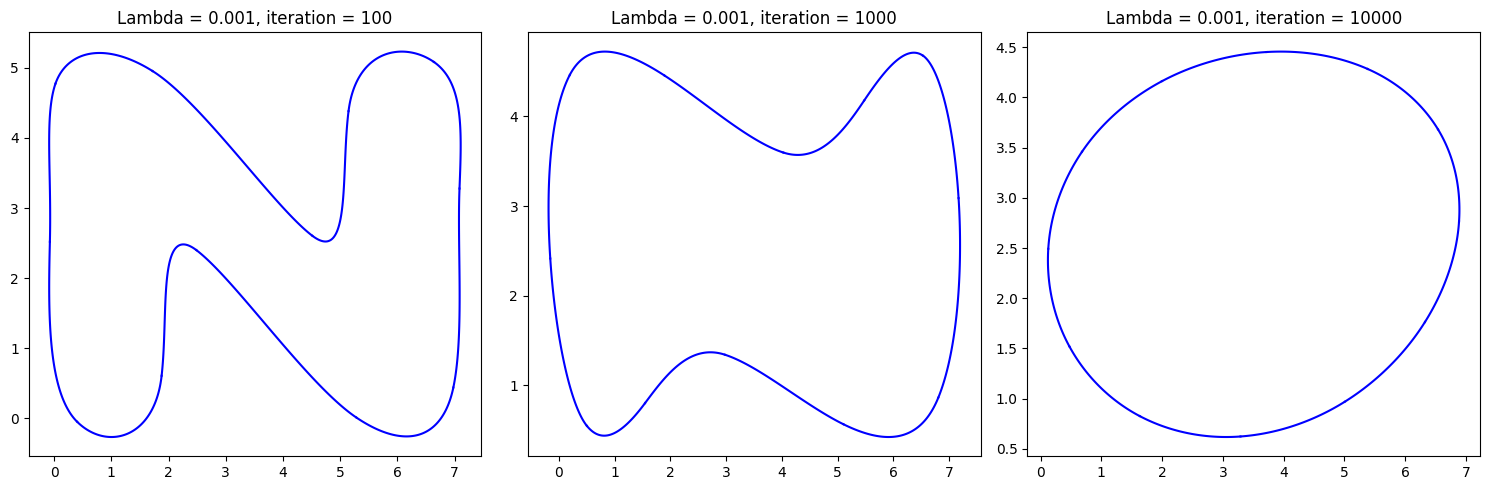

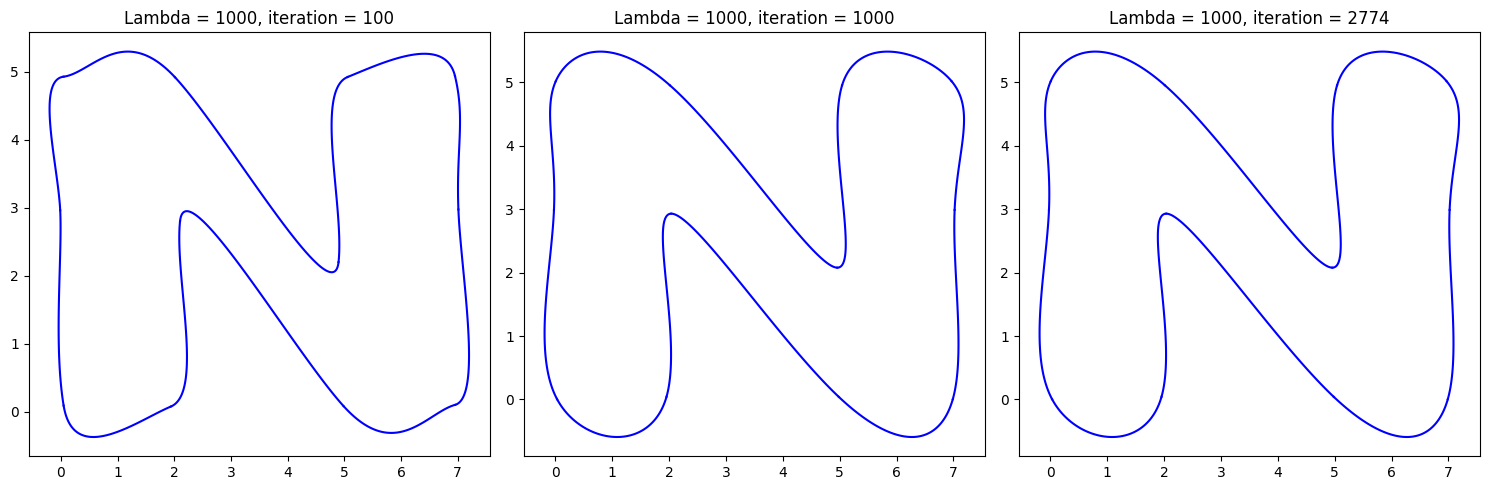

In [12]:
#points and velocities for the letter
N = np.array([(0,0),(0,3),(0,5),(2,5),(5,2),(5,5),(7,5),(7,3),(7,0),(5,0),(2,3),(2,0)])
vel = np.array([(0,3),(0,5),(2,2),(5,-3),(3,0),(2,3),(2,-2),[0, -5],[-2, -3],[-5, 3],[-3, 0],[0, -3]])*1/10

#first calculate the control points, then remove the the last points before optimizing the control points
#then calculate the two last points with the optimized control points. Do this for two different values of lambda, and
#plot the final results
controlPoints = interpolate_periodic(N,vel)
firstTwo = getFirstTwoControlPoints(controlPoints)
lam = 1e-3
iter = [100,1000,10000]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
for idx, it in enumerate(iter):
    optimized, iterations1 = steepestDescent(firstTwo, N, lam, 1e-10, it, 1e-4)
    finalPoints = completeControlPoints(optimized)
    for segment in finalPoints:
        tValues = np.linspace(0, 1, 100)
        bezier = np.array([de_Casteljau(segment, t)[0] for t in tValues])
        axes[idx].plot(bezier[:, 0], bezier[:, 1], 'b-')  
    axes[idx].set_title(f'Lambda = {lam}, iteration = {iterations1}')

plt.tight_layout()
plt.show()

lam = 1000
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
for idx, it in enumerate(iter):
    optimized, iterations1 = steepestDescent(firstTwo, N, lam, 1e-10, it, 1e-4)
    finalPoints = completeControlPoints(optimized)
    for segment in finalPoints:
        tValues = np.linspace(0, 1, 100)
        bezier = np.array([de_Casteljau(segment, t)[0] for t in tValues])
        axes[idx].plot(bezier[:, 0], bezier[:, 1], 'b-')  
    axes[idx].set_title(f'Lambda = {lam}, iteration = {iterations1}')

plt.tight_layout()
plt.show()

From the plots above, we see that for $\lambda = 10^{-3}$,  the number of iterations is always the same as the maximum number of iterations. This means that we never get a difference between the gradients during the calculations below our set tolerance. We see that our letter becomes a smooth circle. This is rather interesting result as we would expect to get a more "shrunk" $N$, but this could vary from letter to letter. For $\lambda = 1000$, we see that we reach our set tolerance after $2772$ iterations. We see that we get a smoother N, as we expected when $\lambda$ would dominate. 